In [1]:
import getdist
import pylab as mplot
import numpy as np
import astropy.io.fits as pf
%pylab inline

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

from getdist.mcsamples import MCSamplesFromCobaya
from getdist.mcsamples import loadMCSamples
import os
from getdist import plots, MCSamples

import matplotlib
%matplotlib inline
# matplotlib.use('TkAgg')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_chain_info(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    Name = []
    for i in range(0,len(a)-3):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
        Name.append(a[i].split('--')[1])
    for i in range(len(a)-3,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines, Name

In [3]:
chain_dir = '/project/chihway/chihway/CosmicShearCosmosis/analysis/delve-campaign/'

c_0, n_0, name_0 = load_chain_info(chain_dir+'fiducial-cuts.txt')
c_1, n_1, name_1 = load_chain_info(chain_dir+'fiducial-data-blinded.txt')


[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13] post

12500
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] alpha1
[16] SIGMA_8
[17] SIGMA_12
[18] 2PT_CHI2
[19] log_weight
[20] prior
[21] post

15600


## Plot fiducial chain with data blinded

In [4]:
# c_0 = np.nan_to_num(c_0)
# c_1 = np.nan_to_num(c_1)

In [5]:
name_0

['omega_m',
 'h0',
 'omega_b',
 'n_s',
 'a_s',
 'omnuh2',
 'a1',
 'alpha1',
 'SIGMA_8',
 'SIGMA_12',
 '2PT_CHI2']

In [6]:
len(c_1)

15600

Removed no burn in
Removed no burn in


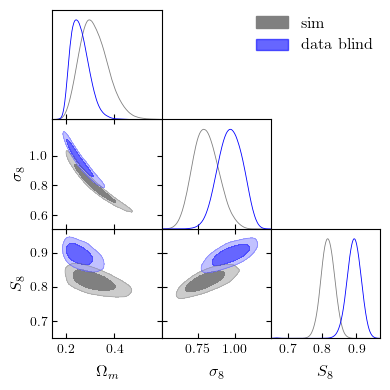

In [9]:
fid_0 = MCSamples(samples = np.c_[c_0[:,0],c_0[:,8], c_0[:,8]*np.sqrt(c_0[:,0]/0.3)],
                weights = np.exp(c_0[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "delve")

fid_1 = MCSamples(samples = np.c_[c_1[:,0],c_1[:,16], c_1[:,16]*np.sqrt(c_1[:,0]/0.3)],
                weights = np.exp(c_1[:,19]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "delve")

g = plots.get_subplot_plotter(width_inch=4)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0, fid_1],
                ['omegam','sigma8', 'S8'], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["sim", "data blind"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b'] )



(0.5, 1.0)

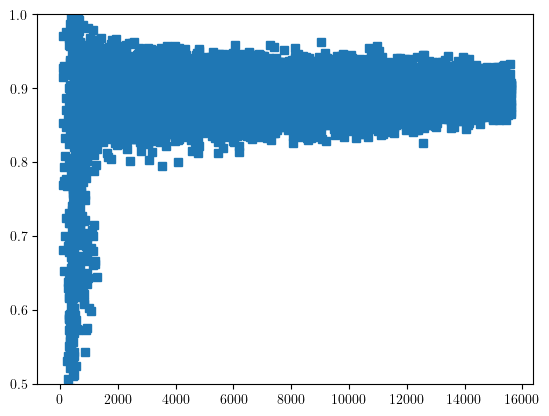

In [10]:
plt.plot(c_1[:,16]*np.sqrt(c_1[:,0]/0.3), lw=0, marker='s')
plt.ylim(0.5, 1)

Removed no burn in


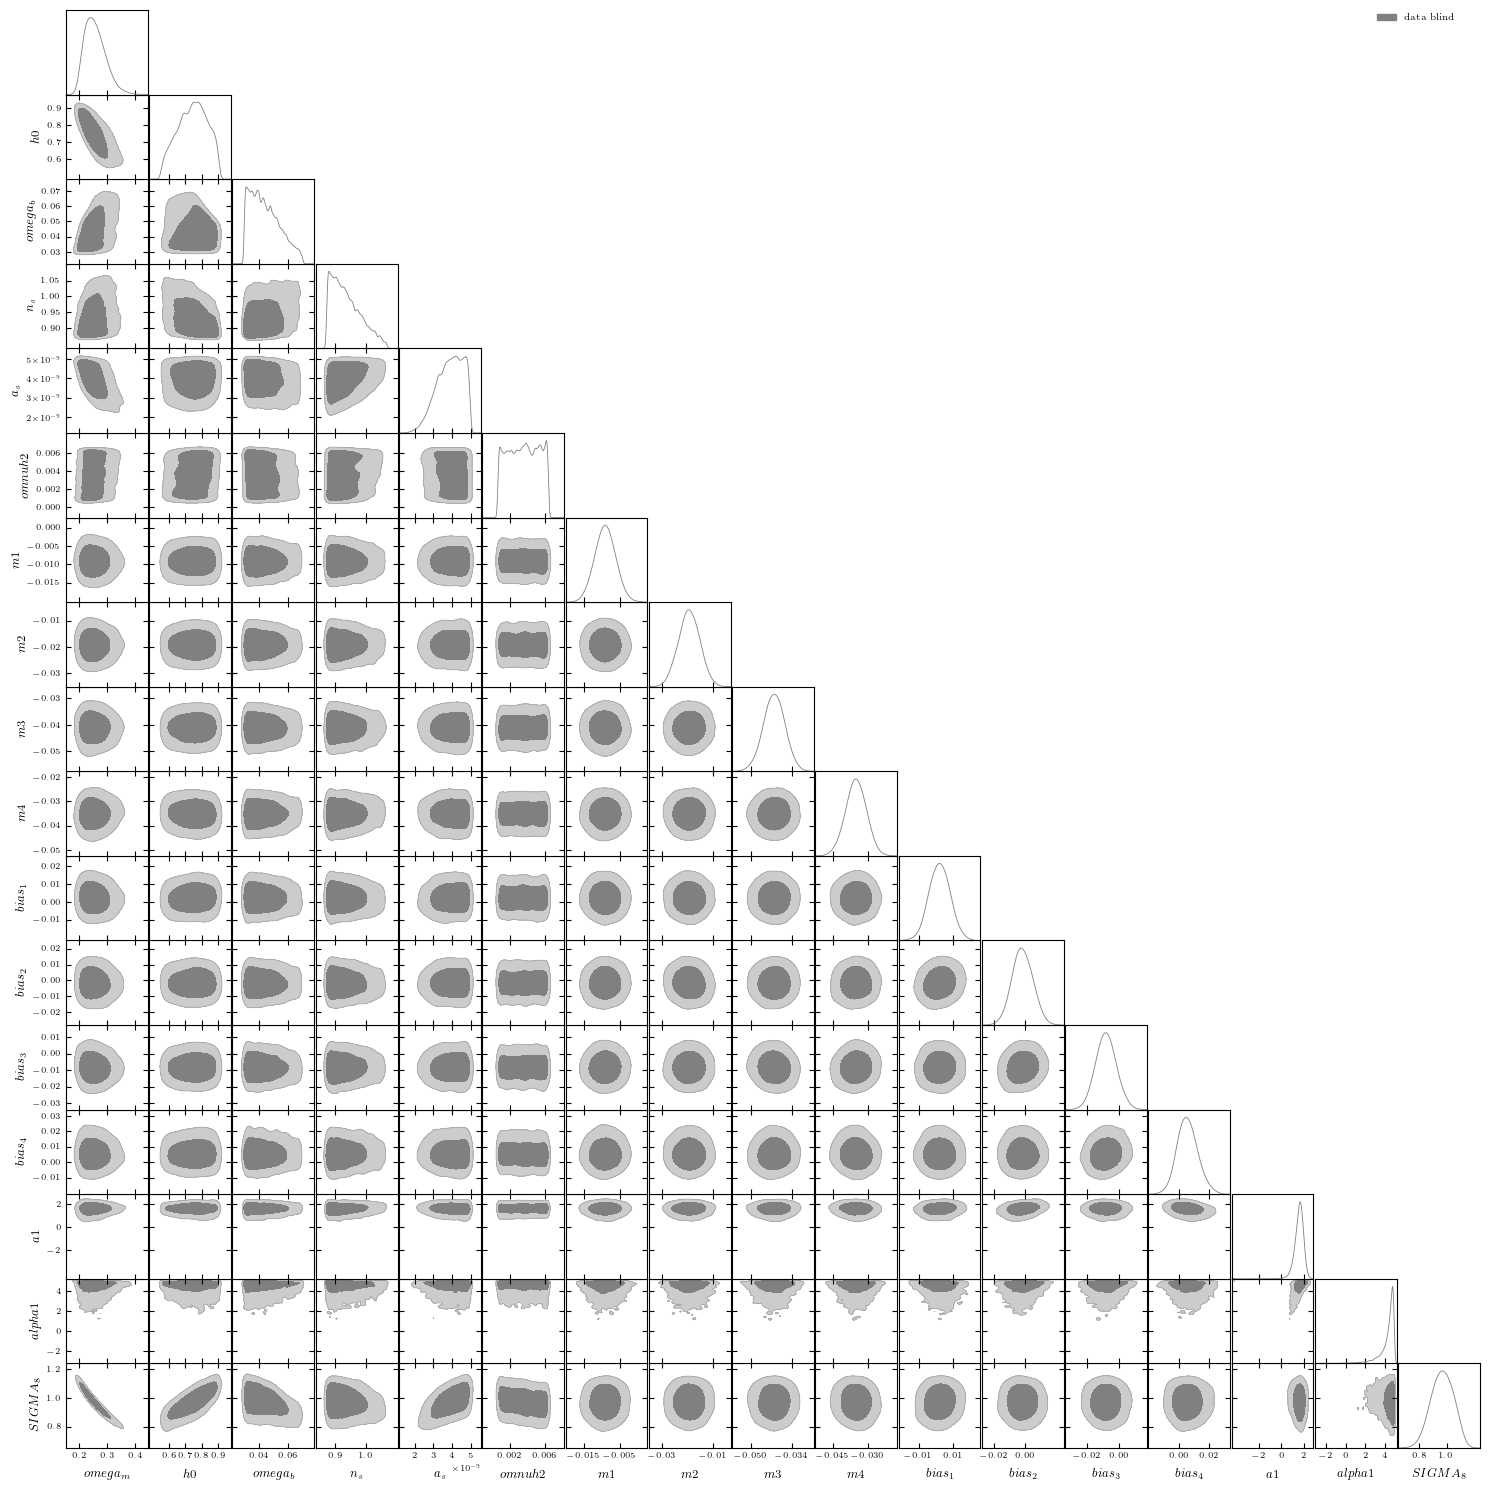

In [11]:
fid_1 = MCSamples(samples = np.c_[c_1[:,0], c_1[:,1], c_1[:,2], c_1[:,3], c_1[:,4], c_1[:,5], c_1[:,6], c_1[:,7], c_1[:,8]
                  , c_1[:,9], c_1[:,10], c_1[:,11], c_1[:,12], c_1[:,13], c_1[:,14], c_1[:,15], c_1[:,16]],
                weights = np.exp(c_1[:,19]),
                names   = name_1[:17],
                labels  = name_1[:17],
                label   = "delve")

g = plots.get_subplot_plotter(width_inch=15)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
# g.settings.axes_fontsize=14
# g.settings.axes_labelsize=16
# g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_1],
                name_1[:17], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["data blind"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b'] )



Removed no burn in


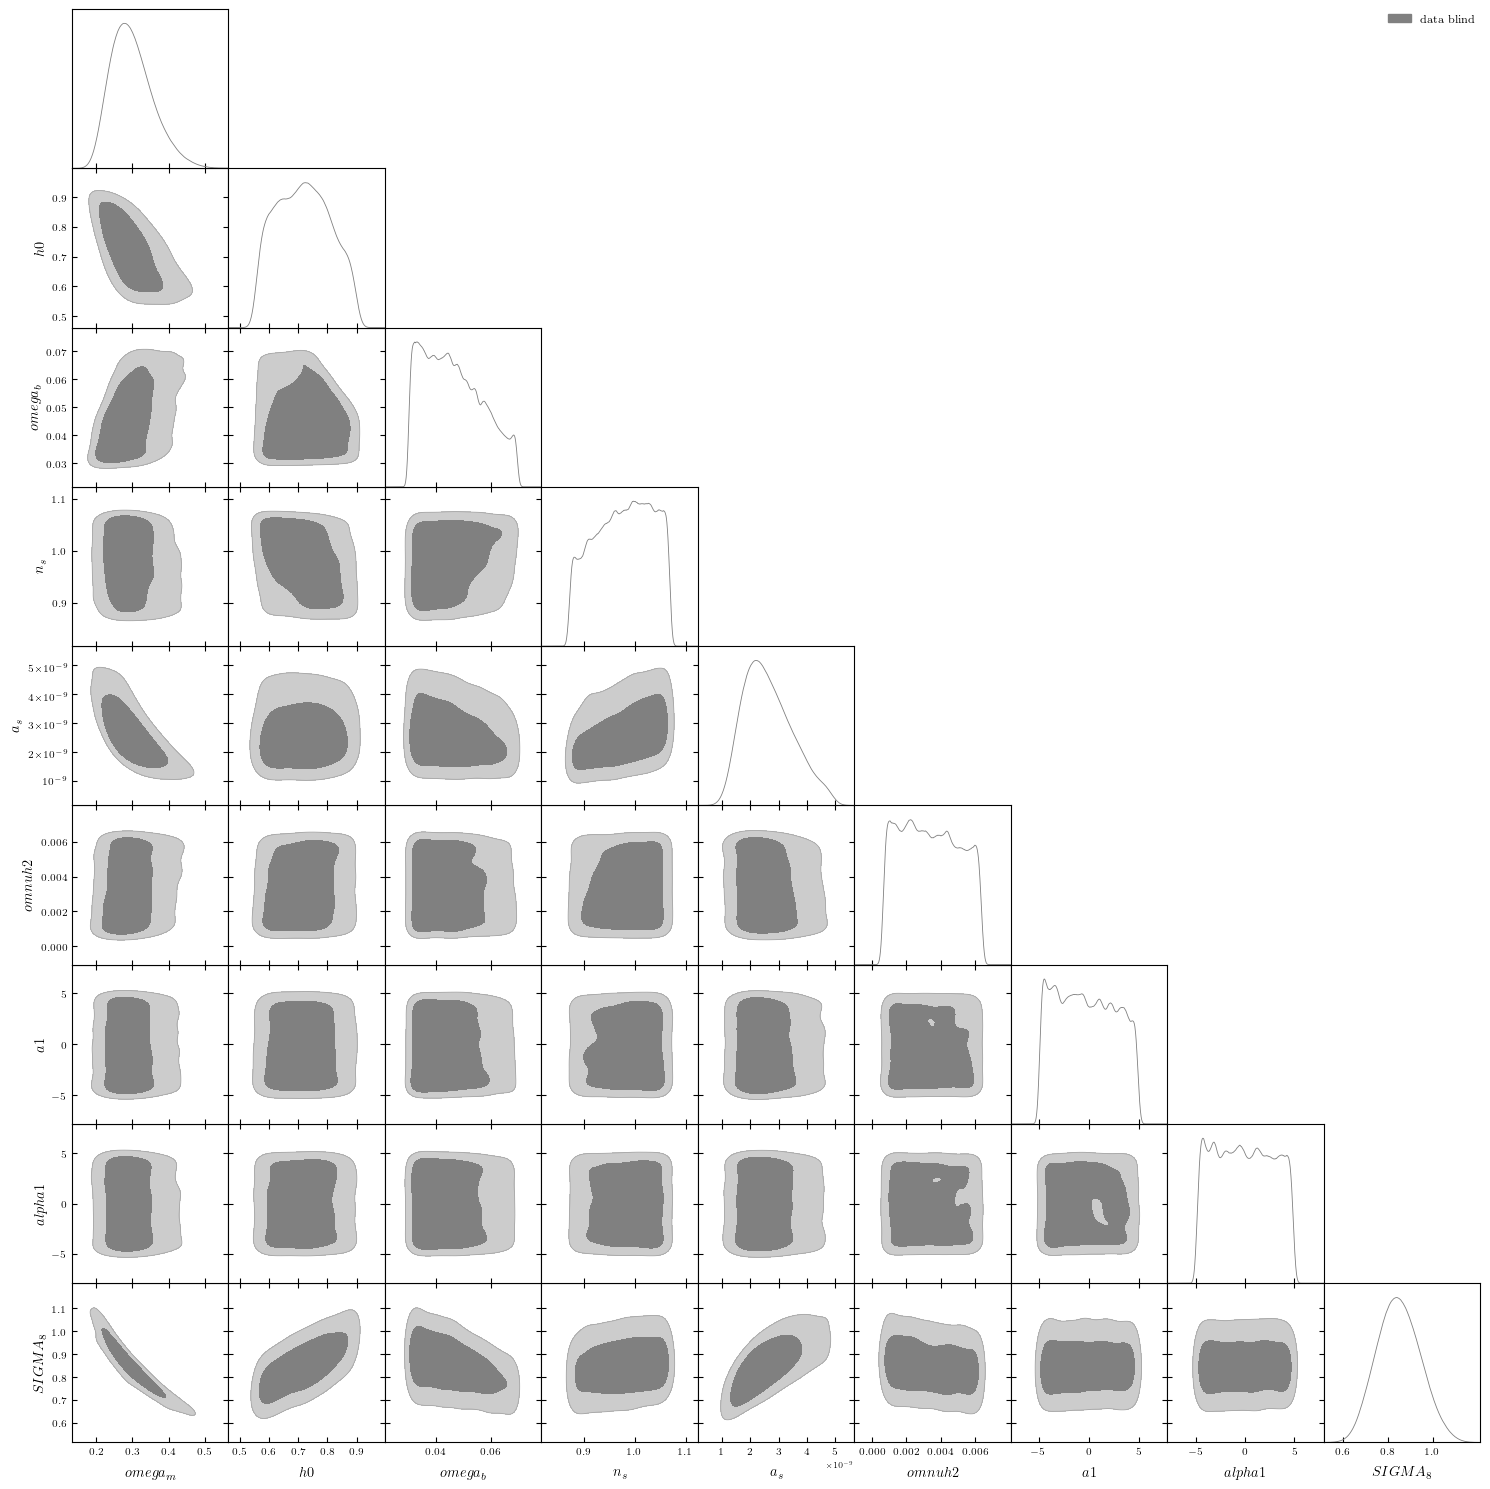

In [56]:

fid_0 = MCSamples(samples = np.c_[c_0[:,0], c_0[:,1], c_0[:,2], c_0[:,3], c_0[:,4], c_0[:,5], c_0[:,6], c_0[:,7], c_0[:,8]],
                weights = np.exp(c_0[:,11]),
                names   = name_0[:9],
                labels  = name_0[:9],
                label   = "delve")

g = plots.get_subplot_plotter(width_inch=15)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
# g.settings.axes_fontsize=14
# g.settings.axes_labelsize=16
# g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0],
                name_0[:9], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["data blind"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b'] )
